Neural Network trained on 30 second feature set

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
%matplotlib inline
import csv

# sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import preprocessing

In [ ]:
song_dir =os.listdir('/content/drive/My Drive/RP/genres')

In [ ]:
dataset_path ='/content/drive/My Drive/RP/Data.csv'

master_data = pd.read_csv(dataset_path) 
master_data.head()



,centroid_max,centroid_min,centroid_mean,centroid_std,centroid_kurtosis,centroid_skew,rolloff_max,rolloff_min,rolloff_mean,rolloff_std,rolloff_kurtosis,rolloff_skew,flux_max,flux_min,flux_mean,flux_std,flux_kurtosis,flux_skew,rmse_max,rmse_min,rmse_mean,rmse_std,rmse_kurtosis,rmse_skew,zcr_max,zcr_min,zcr_mean,zcr_std,zcr_kurtosis,zcr_skew,contrast_max,contrast_min,contrast_mean,contrast_std,contrast_kurtosis,contrast_skew,bandwidth_max,bandwidth_min,bandwidth_mean,bandwidth_std,...,mfcc_6_std,mfcc_6_kurtosis,mfcc_6_skew,mfcc_7_max,mfcc_7_min,mfcc_7_mean,mfcc_7_std,mfcc_7_kurtosis,mfcc_7_skew,mfcc_8_max,mfcc_8_min,mfcc_8_mean,mfcc_8_std,mfcc_8_kurtosis,mfcc_8_skew,mfcc_9_max,mfcc_9_min,mfcc_9_mean,mfcc_9_std,mfcc_9_kurtosis,mfcc_9_skew,mfcc_10_max,mfcc_10_min,mfcc_10_mean,mfcc_10_std,mfcc_10_kurtosis,mfcc_10_skew,mfcc_11_max,mfcc_11_min,mfcc_11_mean,mfcc_11_std,mfcc_11_kurtosis,mfcc_11_skew,mfcc_12_max,mfcc_12_min,mfcc_12_mean,mfcc_12_std,mfcc_12_kurtosis,mfcc_12_skew,genre
0,4464.156642,849.658285,1835.494603,585.961468,1.536058,1.049734,7084.423828,1152.026367,3580.945013,1253.915665,-0.589893,0.327106,12.954988,0.0,1.644384,1.958142,6.068005,2.287192,0.288393,0.007671,0.091563,0.047996,0.646815,0.849254,0.366211,0.039551,0.101500,0.044199,5.710074,1.939640,54.526649,6.113804,21.467739,7.938795,1.252378,1.244233,2770.695509,1081.656537,1748.362448,297.432368,...,9.658838,0.572860,-0.583507,33.730677,-27.954872,0.503117,11.168602,-0.228461,0.516213,24.094106,-44.258590,-11.805831,11.400602,-0.009328,-0.184066,30.684135,-24.465716,1.206804,9.987699,-0.303852,0.183510,24.979963,-41.409291,-13.083820,8.962364,1.803803,0.596276,31.721020,-30.323239,-2.806385,9.298361,0.430402,0.456069,24.070390,-36.607308,-6.934122,9.466887,0.057029,0.132279,blues
1,3236.442116,318.713500,1070.119953,429.532791,1.803354,1.001449,7611.987305,387.597656,2185.028454,1222.395194,1.608416,1.245734,14.619909,0.0,1.247379,1.750351,12.675193,3.203631,0.383715,0.009310,0.141191,0.079617,-0.381391,0.525917,0.145020,0.006348,0.033309,0.020569,2.017897,1.072661,53.952526,5.438508,21.428764,7.962859,-0.023194,0.871523,3174.579278,671.098012,1596.333948,408.119547,...,12.491243,0.366743,-0.887007,30.783287,-18.335242,9.297965,9.008867,-0.251998,-0.328337,25.273713,-29.548192,-0.757741,9.601001,-0.467246,-0.325538,32.761795,-29.347543,8.149012,8.438341,1.682580,-0.656629,25.346260,-45.598267,-3.196314,10.502337,0.191071,-0.346805,40.363245,-14.122019,6.087676,6.942457,1.569782,0.613722,20.651334,-32.890564,-2.476420,7.538023,0.499351,-0.163374,blues
2,5444.293577,421.091729,1529.835316,613.175361,4.028086,1.339397,8085.717773,333.764648,3548.820207,1725.249654,-0.647548,0.447830,17.791127,0.0,1.444008,1.996799,12.743417,3.142622,0.271687,0.004361,0.095918,0.048718,-0.058206,0.299131,0.323730,0.006348,0.056044,0.038059,9.193445,2.362931,48.775996,5.534489,20.676334,8.239387,1.531287,1.428818,3402.554398,1046.389224,2038.617579,462.379133,...,14.177411,-0.036739,-0.257875,57.322294,-14.032229,23.358672,11.936523,-0.051591,0.107448,21.894634,-52.369707,-10.103616,12.894725,-0.527935,0.009104,40.404282,-29.546380,11.903744,10.219957,0.305566,-0.183417,24.502062,-37.257188,-5.560387,10.262492,0.172146,0.013335,37.242587,-25.349421,5.376802,9.812361,0.054883,0.154526,19.230036,-27.189579,-2.239119,8.055376,-0.182963,0.004210,blues
3,4499.417241,415.633570,1459.078483,661.885670,0.842177,0.967646,6761.425781,441.430664,2795.616429,1273.841376,0.133467,0.905289,16.464624,0.0,1.638620,2.383850,7.557786,2.620426,0.544812,0.002851,0.141796,0.093824,0.951191,0.969008,0.375488,0.017090,0.073028,0.043699,4.160115,1.379952,52.049604,5.271643,23.434488,7.035455,1.509991,0.936985,2682.510435,763.896690,1388.913312,430.296227,...,12.339140,0.584446,-0.145225,30.489766,-31.436108,0.270091,10.148165,-0.064685,0.240794,22.762749,-50.762742,-6.489760,11.446632,0.680415,-0.586795,33.897971,-54.016615,-5.517093,12.392673,1.727890,-0.460252,24.801148,-46.061145,-7.840328,9.354566,1.244

In [ ]:
master_data.shape

(1000, 133)

In [ ]:
y = master_data['genre']
X = master_data.drop(columns=['genre'])

In [ ]:
#scaling data

#scale = StandardScaler()
#x_scaled = pd.DataFrame(scale.fit_transform(X), columns = X.columns)

#transform all the values in range between (0 to 1) .... x = [(value - min)/(Max- Min)]

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = pd.DataFrame(min_max_scaler.fit_transform(X))

In [ ]:
#x_scaled.head()

In [ ]:
#encode the genres:
encoder = LabelEncoder()
y_enc = encoder.fit_transform(y)

In [ ]:
#y_enc
#genre_list.head()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_enc, test_size=0.2)

In [ ]:
len(y_train)

800

In [ ]:
len(y_test)

200

Implementing Neural Network


In [ ]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(x_train.shape[1],)))

model.add(layers.Dense(256, activation='relu'))

model.add(layers.Dense(128, activation='relu'))

model.add(layers.Dense(64, activation='relu'))

model.add(layers.Dense(10, activation='softmax'))

#activation - ‘softmax’ (makes the output sum up to 1)


In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               68096     
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                650       
Total params: 241,226
Trainable params: 241,226
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from keras.callbacks import EarlyStopping
#set early stopping monitor so the model stops training when it won't improve anymore
early_stopping_monitor = EarlyStopping(patience=3)

history = model.fit(x_train,y_train,validation_data=(x_test, y_test),epochs=30,batch_size=32, callbacks=[early_stopping_monitor])

Epoch 1/30
25/25 [==============================] - 1s 25ms/step - loss: 2.2204 - accuracy: 0.2339 - val_loss: 1.8877 - val_accuracy: 0.3750
Epoch 2/30
25/25 [==============================] - 0s 6ms/step - loss: 1.7021 - accuracy: 0.4117 - val_loss: 1.4846 - val_accuracy: 0.4650
Epoch 3/30
25/25 [==============================] - 0s 11ms/step - loss: 1.3898 - accuracy: 0.4606 - val_loss: 1.3027 - val_accuracy: 0.5100
Epoch 4/30
25/25 [==============================] - 0s 6ms/step - loss: 1.2024 - accuracy: 0.5406 - val_loss: 1.2213 - val_accuracy: 0.5100
Epoch 5/30
25/25 [==============================] - 0s 7ms/step - loss: 1.1158 - accuracy: 0.5765 - val_loss: 1.2187 - val_accuracy: 0.5250
Epoch 6/30
25/25 [==============================] - 0s 5ms/step - loss: 1.1014 - accuracy: 0.5828 - val_loss: 1.2070 - val_accuracy: 0.5100
Epoch 7/30
25/25 [==============================] - 0s 6ms/step - loss: 0.9621 - accuracy: 0.6390 - val_loss: 0.9882 - val_accuracy: 0.6650
Epoch 8/30
25/25 [

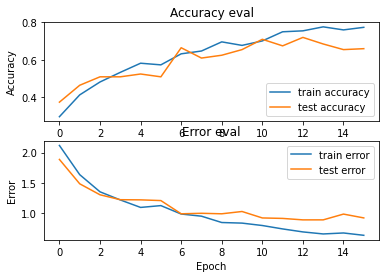

In [ ]:
def plot_history(history):
    """Plots accuracy/loss for training/validation set as a function of the epochs
        :param history: Training history of model
        :return:
    """

    fig, axs = plt.subplots(2)

    # create accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()

plot_history(history)

Improvise model and check for overfitting

In [ ]:
from keras import models, layers, regularizers
from keras import layers

model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(x_train.shape[1],)))
layers.Dropout(0.2),

model.add(layers.Dense(256, activation='relu'))
layers.Dropout(0.2),

model.add(layers.Dense(128, activation='relu'))
layers.Dropout(0.2),

model.add(layers.Dense(64, activation='relu'))
layers.Dropout(0.2),

model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 512)               68096     
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_8 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_9 (Dense)              (None, 10)                650       
Total params: 241,226
Trainable params: 241,226
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(x_train,y_train,validation_data=(x_test, y_test),epochs=50,batch_size=128)

Epoch 1/50
7/7 [==============================] - 1s 53ms/step - loss: 2.2504 - accuracy: 0.1830 - val_loss: 2.0644 - val_accuracy: 0.3500
Epoch 2/50
7/7 [==============================] - 0s 13ms/step - loss: 2.0105 - accuracy: 0.4015 - val_loss: 1.8328 - val_accuracy: 0.3600
Epoch 3/50
7/7 [==============================] - 0s 16ms/step - loss: 1.7674 - accuracy: 0.3976 - val_loss: 1.6387 - val_accuracy: 0.4200
Epoch 4/50
7/7 [==============================] - 0s 14ms/step - loss: 1.5093 - accuracy: 0.4737 - val_loss: 1.4523 - val_accuracy: 0.4600
Epoch 5/50
7/7 [==============================] - 0s 12ms/step - loss: 1.3551 - accuracy: 0.5336 - val_loss: 1.3378 - val_accuracy: 0.5050
Epoch 6/50
7/7 [==============================] - 0s 13ms/step - loss: 1.1925 - accuracy: 0.5670 - val_loss: 1.2277 - val_accuracy: 0.5750
Epoch 7/50
7/7 [==============================] - 0s 13ms/step - loss: 1.1619 - accuracy: 0.5718 - val_loss: 1.2513 - val_accuracy: 0.5050
Epoch 8/50
7/7 [===========

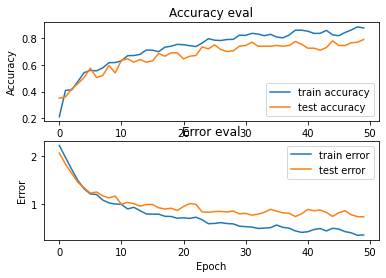

In [ ]:
def plot_history(history):
    """Plots accuracy/loss for training/validation set as a function of the epochs
        :param history: Training history of model
        :return:
    """

    fig, axs = plt.subplots(2)

    # create accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()

plot_history(history)